In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Helper Function

In [8]:
def sort_xcat_by_y(x, y):
    """
    return a sorted list of unique categories in predictor x according to y
    """
    cats = np.unique(x)
    y_mean = [ np.mean(y[x==cat]) for cat in cats ]
    ordered_cats = cats[np.argsort(y_mean)]
    return ordered_cats

def all_rows_equal(X):
    """
    check if all of a bud's rows are equal across all predictors
    """
    return np.all(X == X[0])


In [9]:
class Node:
    def __init__(self, X, y, id, parent_id=None, depth=0,leaf=True):
        self.X = X # sample in this node
        self.y = y # target in this node
        self.size = len(y)
        self.id = id
        self.parent_id = parent_id
        self.depth = depth
        self.leaf = leaf

class Splitter:
    def __init__(self):
        self.reduction = 0
        self.splitted = False
        
    def _replace_split(self, reduction, d, dtype='q', t=None, c=None):
        self.reduction = reduction
        self.d = d
        self.dtype = dtype
        self.t = t
        self.c = c
        self.splitted = True


# Loss Function

In [ ]:
def RSS_reduction(child_L, child_R, parent):
    """
    cost function: how much the residual is reduced
    """
    rss_p = np.sum((parent - np.mean(parent))^2)
    rss_l = np.sum((child_L - np.mean(child_L))^2)
    rss_r = np.sum((child_R - np.mean(child_R))^2)
    return rss_p - rss_l - rss_r


# DecisionTreeRegression

In [10]:
class DecisionTreeRegression:
    def __init__(self, X, y, max_depth=100, min_size=5):
        self.X = X
        self.y = y

        self.N, self.D = X.shape
        dtypes = [ np.array(X[:, i]).dtype for i in range(self.D) ]
        self.types = [ 'q' if (dtype == float or dtype == int) else 'c' for dtype in dtypes ]

        # hyperparameters
        self.max_depth = max_depth
        self.min_size = min_size
        
        # initialize
        self.nodes_dict = {}
        self.current_id = 0
        root = Noe(X, y, self.current_id)
        self.nodes_dict[current_id] = root
        self.current_id += 1
        
    def _build_(self):
        """
        loop each observation of each feature in each layer
        O(N) * O(D) * O(log2(M))
        """
        
        splitter = Splitter()
        
        for i in range(self.max_depth): #  each layer
            for dnode in nodes.dict: #  each node in this layer
                for d in range(self.D): # each feature in this node
                    # general info about this feature
                    xd = dnode.X[:, d]
                    dty = self.types[d]

                    # each threshold for this feature
                    # quantitative
                    if dty == 'q':
                        for v in np.unique(xd):
                            yl = self.y[xd <= v]
                            yr = self.y[xd > v]
                            reduction = RSS_reduction(yl, yr, dnode.y)
                            if reduction > splitter.reduction:
                                splitter._replace_split(reduction, d, 'q', v)

                    # categorical
                    if dty == 'c':
                        pass


# Bagging for DecisionTree

In [6]:

class Bagging:
    def bootstrapping(self, X_train, y_train, B):
        self.N, self.D = X_train.shape
        self.B = B

        trees = []
        for i in range(B):
            idx = np.random.choice(range(self.N), self.N, replace=True)
            X_train_sample = X_train[idx]
            y_train_sample = y_train[idx]

            tree = DecisionTreeRegression()
            tree.fit(X_train_sample, y_train_sample)
            trees.append(tree)

        self.trees = trees

    def predict(self, X_test):
        y_predicted = np.zeros((self.B, len(X_test))) # B by N
        
        for i in range(self.B):
            y_predicted[i, :] = self.trees[i].predcit(X_test)

        # return average value of all trees for each observation
        return np.mean(y_predicted, axis=0)


# Unrelated Samples

In [16]:
B = [1, 10, 100]
gain = [100, 10, 1]

iters = 10000
results_iters = np.zeros((len(B), iters))

for (k, b) in enumerate(B): # each bagging
    for i in range(iters): # iterations
        v = 0
        for j in range(b): # each sample
            if np.random.uniform() * 100 > 40:
                v += gain[k]
            else:
                v -= gain[k]
        results_iters[k, i] = v


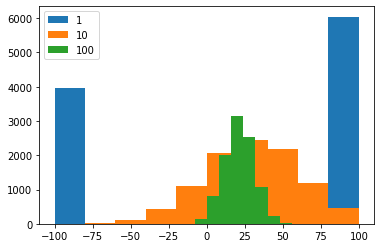

In [39]:
for (i, b) in enumerate(B): # each bagging
    plt.hist(results_iters[i], label=b)

plt.legend()

[0.6041, 0.6281, 0.973]


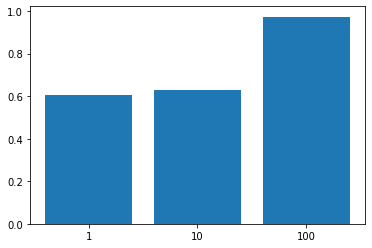

In [38]:
count = [ np.sum(results_iters[i] > 0) / iters for (i, b) in enumerate(B) ]

plt.bar(['1', '10', '100'], count)

print(count)
